**Table of contents**<a id='toc0_'></a>    
- [The UnitTest Module](#toc1_)    
  - [The `setUp()` and `tearDown()` methods](#toc1_1_)    
  - [The `setUpClass(cls)` and `tearDownClass(cls)` classmethods](#toc1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=4
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Unit Testing

Here, **Unit refers to some function and Testing refers to the process of evaluating that function to confirm whether it works as intended.**

Testing your code is a good practice. It simplifies and can also automate the process of evaluating your code. Often using print statements is tedious and not actually worth the time as providing input and comparing the output to the expected value has to be done manually. 

It is also very useful to identify bugs in a code and debug the code methodically.

Ideally, in development conditions you would write your test before even writing the actual program. This is to ensure that the program to be developed works as intended. But, in simple projects you can write the test cases as you write the program, whenever you feel it's necessary.

Testing your code is an absolute necessity as you start to build real world applications in order to ensure that, refactoring or modification of your previously functioning code doesn't have any unintended consequences on the program.

- Here are some thoughts that may help you while writing tests for your programs.
    - set a clear goal as to what your program aims to achieve.
    - think about some test cases (before you write the actual code) which will ensure that your code is working as intended.
    - write down those initial test conditions that you thought about (not code them but simply write them down). 
    - start to write the actual program. You should write your test program along with the main program since that way you will be able to confirm that the different functions and statements in your code (the building blocks) are doing what you expect them to do. 
    - This way if there are any bug in the code you can detect them early in the development process. This will help you to keep sight of your actual goal and achieve that in an efficient manner.
    - But REMEMBER, DON'T GET FIXATED ON TESTING EVERY SINGLE CODE BLOCK.

- Some of the Unit Testing frameworks available in python are,
    - unittest : https://docs.python.org/3/library/unittest.html
    - pytest : https://docs.pytest.org/en/7.2.x/contents.html
        etc.

## <a id='toc1_'></a>[The UnitTest Module](#toc0_)

This module provides a very wide range of functionalities. But for most use cases only the TestCase class will suffice. The TestCase class provides several assert methods to check for and report failures. `Docs:` https://docs.python.org/3/library/unittest.html#unittest.TestCase.debug

- Some of the available assert methods in the TestCase class are, 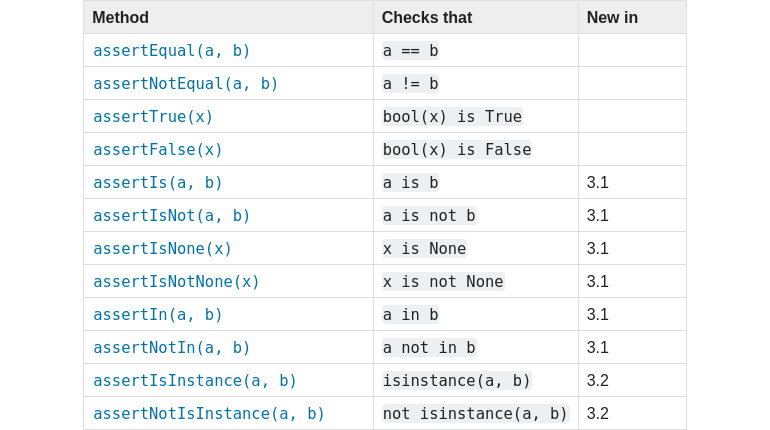

- It is also possible to check the production of exceptions, warnings, and log messages using the following methods --
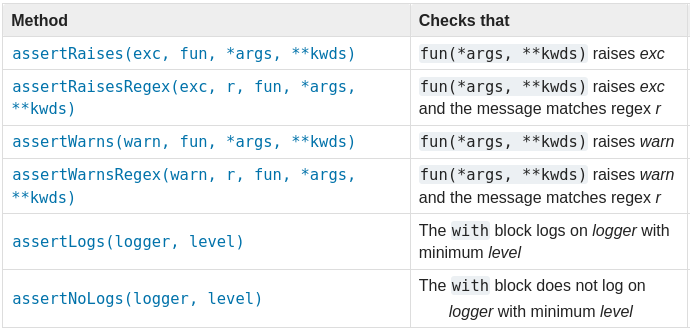

All the assert methods accept a `msg` argument that, if specified, is used as the error message on failure. Note that the msg keyword argument can be passed to `assertRaises()`, `assertRaisesRegex()`, `assertWarns()`, `assertWarnsRegex()` only when they are used as a context manager.

- **For basic demonstration, we would use the simple_calc.py file as the base program to be tested.** 

**Note:** we can load the contents of simple_calc module in jupyter notebook to see what we are actually importing by using the `%load` magic function.

In [1]:
# importing the file where the functions to be tested are defined
# do not use spaces and - characters in the file names. jupyter lab can't seem to import those files
import simple_calc as SimpleCalc

In [2]:
# importing the unittest module
import unittest

-*- Ideally we would write these tests in a separate python file, which should follow the naming convention of `test_<file for which tests are writtern>`. But for demostration purposes here we are using the jupyter notebook since embedding images and urls can be done easily.

    Also, It is likely that we may use test cases that doesn't identify any bugs in the code, but in reality there are still some bugs left in the code. In such cases whenever we encounter a bug that we didn't write test cases for before, it is best practice to update the test cases to check for similar bugs in future. This way we do not waste time later when we may again refactor our code and the same bug occurs.

In [3]:
# Now writing the tests


# First, we create a class that will contain all of our test cases as methods of that class
# this class inherits from the unittest.TestCase
class TestSimpleCalc(unittest.TestCase):
    # it is necessary to use the test_** for naming the test functions or methods
    # so that the unittest module will know which methods to execute.
    def test_add(self):
        # a generic test
        self.assertEqual(SimpleCalc.add(10, 5), 15)
        # we also want to check some edge cases to make sure that our program works as expected
        # one edge case might be that one of the inputs is a negative number
        # another edge case can be that both the inputs are negative numbers
        self.assertEqual(SimpleCalc.add(-10, 5), -5)
        self.assertEqual(SimpleCalc.add(-1, -1), -2)

    def test_subtract(self):
        self.assertEqual(SimpleCalc.subtract(10, 5), 5)
        self.assertEqual(SimpleCalc.subtract(-1, 1), -2)
        self.assertEqual(SimpleCalc.subtract(-1, -1), 0)

    def test_multiply(self):
        self.assertEqual(SimpleCalc.multiply(10, 5), 50)
        self.assertEqual(SimpleCalc.multiply(2, -5), -10)
        self.assertEqual(SimpleCalc.multiply(-1, -6), 6)

    def test_divide(self):
        # one extreeme case is when we try to divide a number by 0
        self.assertRaises(ZeroDivisionError, SimpleCalc.division, 10, 0)
        # we don't have guard against this error in the original code. let us update the code now.
        # this line of code is a bit different than what we have written so far. This is because, the assertRaises function
        # expects you to pass in arguments as assertRaises(err, func, *func_args, **func_kwargs) in this order.

        # But if we wanted to call our function normally, with values as arguments to the function
        # and see if a certain exception is raised we can use a context manager
        with self.assertRaises(ZeroDivisionError):
            SimpleCalc.division(5, 0)


# This will ensure that we can run the test file from the code editor as usual
# rather than going to the terminal and execute it with "$ python -m unittest <test file>"
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)
    # To avoid the end of execution traceback error when ran interactively

....
----------------------------------------------------------------------
Ran 4 tests in 0.004s

OK


**The testing code of a TestCase instance should be entirely self contained, such that it can be run either in isolation or in arbitrary combination with any number of other test cases. In other words, one test case shouldn't be depended on another since the test cases are not necessarily run in top to bottom order.**

### <a id='toc1_1_'></a>[The `setUp()` and `tearDown()` methods](#toc0_)

In our TestClass which inherits from the unittest.TestCase class, we can define two special methods namely setUp() and tearDown() that helps greatly in simplifying the workflow.

The setUp(), tearDown(), and __init__() methods will be called once per test. The setUp() and tearDown() methods allow you to define instructions that will be executed before and after each test method. 

Tests can be numerous, and their set-up can be repetitive. Luckily, we can factor out set-up code by implementing a method called setUp(), which the testing framework will automatically call for every single test we run. 

If the setUp() method raises an exception while the test is running, the framework will consider the test to have suffered an error, and the test method will not be executed.

Similarly, we can provide a tearDown() method that tidies up after the test method has been run.

- **For demonstrating the use of setUp() and tearDown() method we will use the employee.py file**

In [4]:
import unittest

from employee import Employee

In [5]:
# First let's create a test procedure to test the email method
class TestEmployee(unittest.TestCase):
    def test_email(self):
        emp1 = Employee("Maidul", "Hasan", 50000)

        self.assertEqual(emp1.email, "maidul.hasan@email.com")

        # now let's change the first and last name of the employee
        emp1.first = "Palas"
        emp1.last = "Mia"

        self.assertEqual(emp1.email, "palas.mia@email.com")


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


Now imagine, how tedious it would be to write such test cases to test all of the Employee class methods. Also usually we would test with more than 1 instance. Instantiating employees like that i.e, at the start of every test, is not ideal. In such cases we can use the setUp() method to initialize all the employees we want at once at the start of each test and we can later use these as we need in our test.

    Although we have previously used only emp1 or emp2 to refer to the employee instances we now need to use self.emp1 or self.emp2 since they will be used across different methods of the same class.

In [6]:
# First let's create a test procedure to test the email method
class TestEmployee(unittest.TestCase):
    def setUp(self):
        self.emp1 = Employee("Maidul", "Hasan", 50000)
        self.emp2 = Employee("Palas", "Mia", 55000)
        self.emp3 = Employee("Moinul", "Hossain", 60000)

    def test_email(self):
        self.assertEqual(self.emp1.email, "maidul.hasan@email.com")
        self.assertEqual(self.emp2.email, "palas.mia@email.com")

        # now let's change the first and last name of the employee
        self.emp1.first = "Palas"
        self.emp2.first = "Hasan"

        self.assertEqual(self.emp1.email, "palas.hasan@email.com")
        self.assertEqual(self.emp2.email, "hasan.mia@email.com")


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


    One application of using the tearDown() method would be, when we run some tests which modifies the file tree and after completing the tests we want to remove the newly created files from the directory.  

### <a id='toc1_2_'></a>[The `setUpClass(cls)` and `tearDownClass(cls)` classmethods](#toc0_)

    @classmethod means that we are interacting with the class itself rather than individual instances of a class

- `setUpClass` is called with the class as the only argument and must be decorated as a classmethod(). This method is called before initiation of any tests in an individual class. 

One example where this would be useful is when we need to read data from a database and store them in some variables or data structures. Usually in such cases it is not necessary to read the data at the start of each test. Rather this influences the performance of the code negatively.

- `tearDownClass` is also called with the class as the only argument and must be decorated as a classmethod(). This method is called after all the tests in an individual class has been run.

- **Let us see when do these methods gets executed in the testing process**

In [7]:
class TestEmployee(unittest.TestCase):
    @classmethod
    def setUpClass(cls):
        print("setUpClass method \n")

    @classmethod
    def tearDownClass(cls):
        print("tearDownClass method \n")

    def setUp(self):
        print("setUp method \n")
        self.emp1 = Employee("Maidul", "Hasan", 50000)
        self.emp2 = Employee("Palas", "Mia", 55000)
        self.emp3 = Employee("Moinul", "Hossain", 60000)

    def tearDown(self):
        print("tearDown method \n")

    def test_email(self):
        self.assertEqual(self.emp1.email, "maidul.hasan@email.com")
        self.assertEqual(self.emp2.email, "palas.mia@email.com")

    def test_fullname(self):
        self.assertEqual(self.emp1.fullname, "Maidul Hasan")
        self.assertEqual(self.emp2.fullname, "Palas Mia")


if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)

......

setUpClass method 

setUp method 

tearDown method 

setUp method 

tearDown method 

tearDownClass method 




----------------------------------------------------------------------
Ran 6 tests in 0.007s

OK
